# Edge Detection

In [1]:
import cv2
import sys
from matplotlib import pyplot as plt 
import numpy as np
import scipy as sp
from scipy import signal
import scipy.ndimage as nd
from PIL import Image
import math
from skimage.io import imread

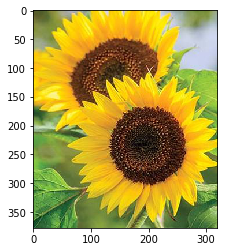

In [2]:
image = imread('Sunflower.jpg');
plt.imshow(image)

In [3]:
def grayscale(rgb):
    R = rgb[:,:,0]
    G = rgb[:,:,1]
    B = rgb[:,:,2]
    gray = 0.2989*R + 0.5870*G + 0.1140*B
    
    return gray

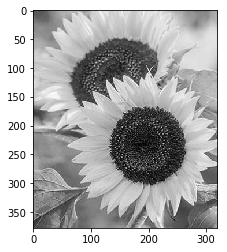

In [4]:
greyImg = grayscale(image);
plt.imshow(greyImg, cmap="gray")

In [5]:
def noise(image, mean, var):
    row,col= image.shape 
    sigma = var ** 0.5
    nse = np.random.normal(mean,sigma,(row,col))
    nse = nse.reshape(row,col)
    noise = image + nse
    
    return noise

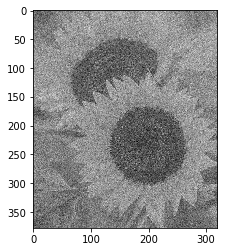

In [6]:
newI = noise(greyImg,0,2000); #gaussian mean=0; var=1000 for noise purpose
plt.imshow(newI, cmap = "gray")

Text(0.5, 1.0, 'With Noise')

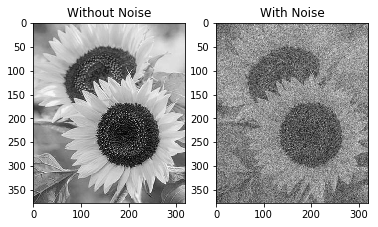

In [7]:
#side by side visualization for ease of comparison
fig, ax = plt.subplots(1,2)
ax[0].imshow(greyImg, cmap='gray')
ax[0].set_title("Without Noise")
ax[1].imshow(newI, cmap='gray')
ax[1].set_title("With Noise")

In [8]:
D = Image.open('Sunflower.jpg')
width, height = D.size
print ("width = {}, height = {}".format(width,height))

width = 320, height = 378


### Sobel Filter

In [9]:
def sobel(im):

    im = im.astype(np.float)
    width, height = im.shape

    kh = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
    kv = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)
   
    gx = signal.convolve2d(im, kh, mode='valid', boundary = 'symm', fillvalue=0)
    gy = signal.convolve2d(im, kv, mode='valid', boundary = 'symm', fillvalue=0)

    s = np.sqrt(gx * gx + gy * gy)
    s *= 255.0 / np.max(s)
    
    return s

In [10]:
detect = sobel(newI);
detect2 = sobel(greyImg);

Text(0.5, 1.0, 'Noise With Sobel Filter')

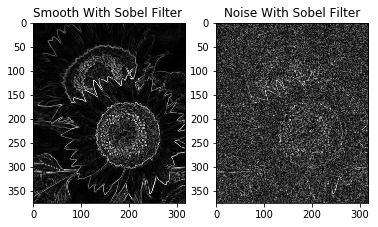

In [11]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(detect2, cmap='gray')
ax[0].set_title("Smooth With Sobel Filter ")
ax[1].imshow(detect, cmap='gray')
ax[1].set_title("Noise With Sobel Filter")

### Prewitt Filter

In [14]:
def prewitt(im):

    im = im.astype(np.float)
    width, height= im.shape

    kh = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype = np.float)
    kv = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype = np.float)
    
    gx = signal.convolve2d(im, kh, mode='same', boundary = 'symm', fillvalue=0)
    gy = signal.convolve2d(im, kv, mode='same', boundary = 'symm', fillvalue=0)

    p = np.sqrt(gx * gx + gy * gy)
    p *= 255.0 / np.max(p)
    
    return p

In [15]:
detect3 = prewitt(newI);
detect4 = prewitt(greyImg);

Text(0.5, 1.0, 'Noise With Prewitt Filter')

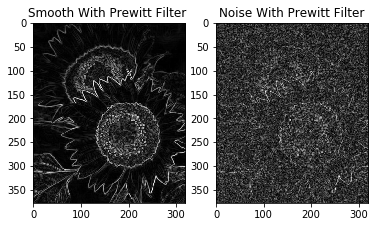

In [16]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(detect4, cmap='gray')
ax[0].set_title("Smooth With Prewitt Filter ")
ax[1].imshow(detect3, cmap='gray')
ax[1].set_title("Noise With Prewitt Filter")

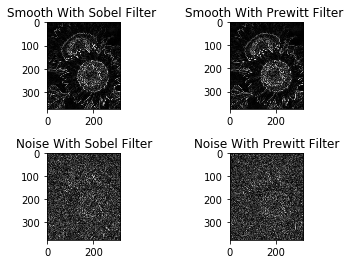

In [17]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(detect2, cmap='gray')
ax[0,0].set_title("Smooth With Sobel Filter ")
ax[0,1].imshow(detect4, cmap='gray')
ax[0,1].set_title("Smooth With Prewitt Filter ")
ax[1,0].imshow(detect, cmap='gray')
ax[1,0].set_title("Noise With Sobel Filter")
ax[1,1].imshow(detect3, cmap='gray')
ax[1,1].set_title("Noise With Prewitt Filter")
fig.subplots_adjust(hspace=0.5)

Text(0.5, 1.0, 'Smooth With Prewitt Filter ')

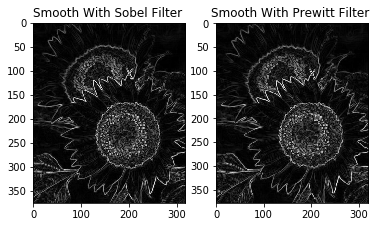

In [18]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(detect2, cmap='gray')
ax[0].set_title("Smooth With Sobel Filter ")
ax[1].imshow(detect4, cmap='gray')
ax[1].set_title("Smooth With Prewitt Filter ")

Text(0.5, 1.0, 'Noise With Prewitt Filter')

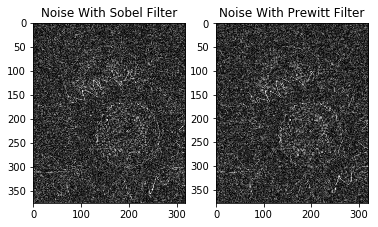

In [19]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(detect, cmap='gray')
ax[0].set_title("Noise With Sobel Filter")
ax[1].imshow(detect3, cmap='gray')
ax[1].set_title("Noise With Prewitt Filter")

### Laplacian Filter

In [20]:
def Laplacian(im, sigma, threshold):

    LoG = nd.gaussian_laplace(im, sigma) 
    output = sp.zeros(LoG.shape) #return array filled with zeros & LoG
    width = output.shape[1] #number of columns
    height = output.shape[0] #number of rows

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            patch = LoG[y-1:y+2, x-1:x+2]
            p = LoG[y, x]
            maxP = patch.max()
            minP = patch.min()
            
            #Zerocrossing
            #Greater than zero for postive response on darker side
            if (p > 0): 
                zero = True if minP < 0 else False
            else:
                zero = True if maxP > 0 else False
            if ((maxP - minP) > threshold) and zero:
                output[y, x] = 1

    return output

In [21]:
lf = noise(greyImg,0,0.01); #gaussian noise

In [22]:
tst = Laplacian(lf,1,0);
tst0 = Laplacian(lf,3,0);
tst1 = Laplacian(lf,5,0);
tst2 = Laplacian(lf,7,0);
tst3 = Laplacian(lf,9,0);
tst4 = Laplacian(lf,11,0);

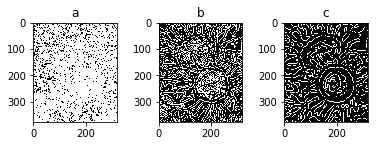

In [23]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(tst, cmap='gray')
ax[0].set_title("a")
ax[1].imshow(tst0, cmap='gray')
ax[1].set_title("b")
ax[2].imshow(tst1, cmap='gray')
ax[2].set_title("c")
fig.subplots_adjust(wspace=0.5)

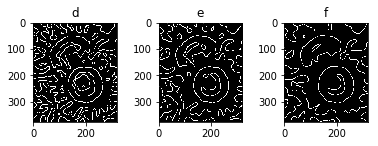

In [24]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(tst2, cmap='gray')
ax[0].set_title("d")
ax[1].imshow(tst3, cmap='gray')
ax[1].set_title("e")
ax[2].imshow(tst4, cmap='gray')
ax[2].set_title("f")
fig.subplots_adjust(wspace=0.5)